In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import random as rn

#%matplotlib widget

# Task A and B

In [2]:
def TrNN(r,f,rp):
    # r contains the coordinates of the three nodes/vertex of the triangle element
    # rp is the point of interpolation, within the triangle
    # f contains the value of the function at the three nodes/vertex
    
    d = np.ndarray(3)
    w = np.ndarray(3)
    for i in range(0,3):
        # determine the distances of rp from vertices
        d[i] = mt.sqrt( (r[i,0]-rp[0])**2 + (r[i,1]-rp[1])**2  + (r[i,2]-rp[2])**2 )
        # determine the weight for this vertex
        w[i] = 1/ d[i]
    # interpolate with weights
    frp = ( w[0]*f[0] + w[1]*f[1] + w[2]*f[2] ) / (w[0]+[w[1]+w[2]])
    return frp

In [3]:
# Matrix method
def TrBaryc(r,f,rp):
    # r contains the coordinates of the three nodes/vertex of the triangle element
    # rp is the point of interpolation, within the triangle
    # f contains the value of the function at the three nodes/vertex
    
    # form matrix A
    # the first two rows of A are the x and y coordinates of the three vertices
    A = np.copy(np.transpose(r))
    # third row of A is made of ones
    A = np.append(A,[[1,1,1]], axis=0)
    # form d
    # first two rows of d are the x and y coordinate of rp, third row is a one
    d = np.append(rp,1)
    # invert A and multiply by d to find the lambdas
    l = np.dot(np.linalg.inv(A),d)
    # interpolate with the lambdas
    frp = l[0]*f[0] + l[1]*f[1] + l[2]*f[2]
    return frp

2.5


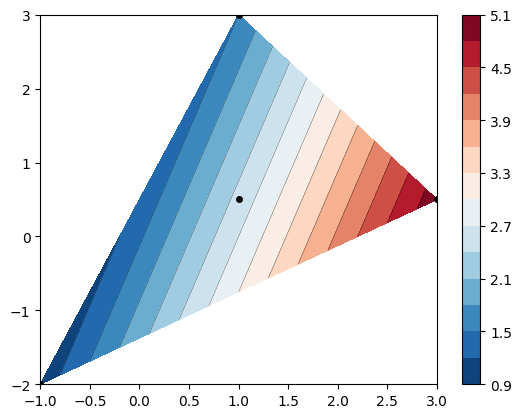

In [4]:
# testing code

# define a triangle
r = np.array([[-1,-2],[1,3],[3,0.5]])
# define a point rp within the triangle
rp = np.array([1,0.5])
# define the value of the function at the vertices
f = np.array([1,1.5,5])

# interpolate3
#frp = TrNN(r,f,rp)
frp = TrBaryc(r,f,rp)
print(frp)
# append rp to the vertices and frp for f
r = np.append(r,[rp],axis=0)
f = np.append(f,frp)

# plot in 3d: f vs (x and y)
x = r[:,0]
y = r[:,1]
fig = pl.figure()
pl.tricontour(x, y, f, levels=14, linewidths=0.2, colors='k')
cntr1 = pl.tricontourf(x, y, f, levels=14, cmap="RdBu_r")
fig.colorbar(cntr1)
pl.plot(x,y,'ko', ms=4)

# Task C

In [5]:
def PlotMesh3D(nodes,elements,func):  

    fig = pl.figure()
    ax = pl.axes(projection='3d')
    ax.plot_trisurf(nodes[:,0], nodes[:,1], nodes[:,2], triangles = elements, edgecolor=[[0,0,0]], linewidth=1.0, alpha=0.0, shade=True)
    #cntr1 = pl.contour(nodes[:,0],nodes[:,1],func, levels=14, cmap="RdBu_r")
    #fig.colorbar(cntr1)
    pl.xlabel('x')
    pl.ylabel('y')
    ax.view_init(elev=30, azim=80, roll=0)
    pl.show()

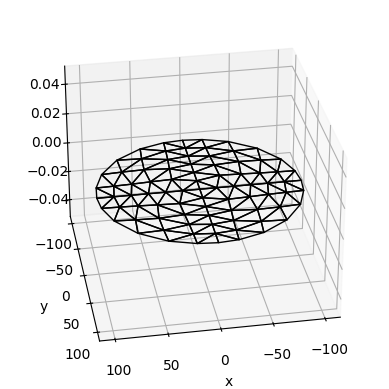

In [6]:
f = open('Hob.Elements.txt','r')
te = f.readlines()
f.close()
f = open('Hob.Nodes.txt','r')
tn = f.readlines()
f.close()

Ne = len(te)
Nn = len(tn)

elementshob = np.ndarray((Ne,3),dtype=int)
for i in range(len(te)):
    temp = te[i].split(',',3)
    elementshob[i,:] = [int(val) for val in temp]
    
nodeshob = np.ndarray((Nn,3),dtype=float)
for i in range(Nn):
    temp = tn[i].split(',',3)
    nodeshob[i,:] = [float(val) for val in temp]

f = open('Hob.Temperatures.txt','r')
t = f.readlines()
f.close()
Thob = np.ndarray(Nn,dtype=float)
for i in range(len(t)):
    Thob[i] = float(t[i])

PlotMesh3D(nodeshob,elementshob,Thob)




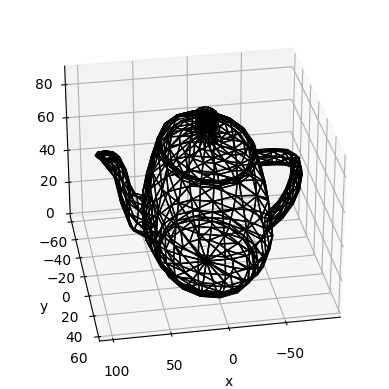

In [8]:
f = open('TeaPot.Elements.txt','r')
te = f.readlines()
f.close()
f = open('TeaPot.Nodes.txt','r')
tn = f.readlines()
f.close()

Ne = len(te)
Nn = len(tn)

elementspot = np.ndarray((Ne,3),dtype=int)
for i in range(len(te)):
    temp = te[i].split(',',3)
    elementspot[i,:] = [int(val)-1 for val in temp]
    
nodespot = np.ndarray((Nn,3),dtype=float)
for i in range(Nn):
    temp = tn[i].split(',',3)
    nodespot[i,:] = [float(val) for val in temp]

    
PlotMesh3D(nodespot,elementspot,nodespot)


In [9]:
def AreaTriangle(A,B):
    # A and B are nodal points in R3
    # cross product A x B
    CP = np.cross(A,B) / 2
    A = np.sqrt(CP.dot(CP))
    return A
    

In [10]:
def FindInternal(A,B,C,P):
    # A, B, C and P are nodal points in R3
    A1 = AreaTriangle((B-P),(C-P))
    A2 = AreaTriangle((C-P),(A-P))
    A3 = AreaTriangle((A-P),(B-P))
    
    At = AreaTriangle((B-A),(C-A))
    
    if abs( (A1+A2+A3) - At ) < 0.1:
        res = True
    else:
        res = False
    return res

In [12]:
# scroll all nodal points at the base of the pot (y=0)
Nnp = len(nodespot)
Neh = len(elementshob)
BaseNodes = np.zeros(Nnp,dtype=int)
Inelement = np.zeros(Nnp,dtype=int)
Nb = 0
for i in range(Nnp):
    if nodespot[i,2] == 0:
        # this node is at the base of the pot
        P = nodespot[i,:]
        BaseNodes[Nb] = i
        # determine which element of the mesh hob contains it
        for j in range(Neh):
            # extract the nodes of this element
            A = nodeshob[elementshob[j,0]]
            B = nodeshob[elementshob[j,1]]
            C = nodeshob[elementshob[j,2]]
            # determine if P is internal to triangle ABC
            IsInternal = FindInternal(A,B,C,P)
            if IsInternal:
                Inelement[Nb] = j
        Nb += 1

Tpot = np.zeros(Nb)
for i in range(Nb):
    # set the triangle contributing to interpolation of node i
    el = elementshob[Inelement[i]]
    r = nodeshob[el]
    rp = nodespot[BaseNodes[i]]
    fr = np.array([Thob[el[0]],Thob[el[1]],Thob[el[2]]])
    Tpot[i] = TrNN(r,fr,rp)




/var/folders/nh/d6mbhcsn0bv2bd2bq4cj0vh40000gn/T/ipykernel_84970/3035664683.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Tpot[i] = TrNN(r,fr,rp)
